## Импорт библиотек

In [ ]:
import math
import pandas as pd
import numpy as np


from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
plt.style.use('fivethirtyeight')
color_pal = sns.color_palette()

from colorama import Style, Fore
blk = Style.BRIGHT + Fore.BLACK
mgt = Style.BRIGHT + Fore.MAGENTA
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
res = Style.RESET_ALL

In [ ]:
# pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Загрузка данных

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile

with ZipFile("drive/MyDrive/Machine Learning projects/Playground Series/Season 3, Episode 13/playground-series-s3e13.zip") as myzip:
    train = myzip.open("train.csv")
    test = myzip.open("test.csv")
    submission = myzip.open("sample_submission.csv")
train = pd.read_csv(train)
test = pd.read_csv(test)
submission = pd.read_csv(submission)

In [ ]:
train.head()

,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,hypotension,pleural_effusion,ascites,gastro_bleeding,swelling,nausea,chills,myalgia,digestion_trouble,fatigue,skin_lesions,stomach_pain,orbital_pain,neck_pain,weakness,back_pain,weight_loss,gum_bleed,jaundice,coma,diziness,inflammation,red_eyes,loss_of_appetite,urination_loss,slow_heart_rate,abdominal_pain,light_sensitivity,yellow_skin,yellow_eyes,facial_distortion,microcephaly,rigor,bitter_tongue,convulsion,anemia,cocacola_urine,hypoglycemia,prostraction,hyperpyrexia,stiff_neck,irritability,confusion,tremor,paralysis,lymph_swells,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash,prognosis
0,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lyme_disease
1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tungiasis
2,2,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,Lyme_disease
3,3,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zika
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,Rift_Valley_fever


In [ ]:
test.head()

,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,hypotension,pleural_effusion,ascites,gastro_bleeding,swelling,nausea,chills,myalgia,digestion_trouble,fatigue,skin_lesions,stomach_pain,orbital_pain,neck_pain,weakness,back_pain,weight_loss,gum_bleed,jaundice,coma,diziness,inflammation,red_eyes,loss_of_appetite,urination_loss,slow_heart_rate,abdominal_pain,light_sensitivity,yellow_skin,yellow_eyes,facial_distortion,microcephaly,rigor,bitter_tongue,convulsion,anemia,cocacola_urine,hypoglycemia,prostraction,hyperpyrexia,stiff_neck,irritability,confusion,tremor,paralysis,lymph_swells,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash
0,707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,708,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,709,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,710,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,711,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Разведочный анализ данных

In [ ]:
train = train.drop(columns='id')
test = test.drop(columns='id')


print(f'{red}train shape {train.shape}')
print(f'{blu}test shape {test.shape}')

train shape (707, 65)
test shape (303, 64)


### Функции для визуализации данных

In [ ]:
def distribution_view(train_df, test_df, features:list, NCOLS:int):
    
    NROWS = math.ceil(len(features) / NCOLS)
    fig, ax = plt.subplots(NROWS, NCOLS, figsize=(20,50))
    ax = ax.flatten() # вытягиваем ax в одномерный массив, чтобы не бежать по циклу отдельно по строкам и столбцам

    for i, col in enumerate(features):

        sns.kdeplot(data=train_df, x=train_df[col],
                    ax=ax[i], color=color_pal[0])
            
        sns.kdeplot(data=train_df, x=test_df[col],
                    ax=ax[i], color=color_pal[1])
            
        ax[i].set_ylabel('')
        ax[i].legend(['Train', 'Test'])

    fig.suptitle(f'Dataset Feature Distributions\n\n\n\n', ha='center',  fontweight='bold', fontsize=25)
    plt.tight_layout() # уменьшает зазор между названием графика и самим графиком
        
    return


In [ ]:
def ploting_cat_features(data, features:list, NCOLS:int):
    
    NROWS = math.ceil(len(features) / NCOLS)
    fig, ax = plt.subplots(NROWS, NCOLS, figsize=(20,650))
    ax = ax.flatten()

    for i, col in enumerate(features):

        sns.countplot(data=data, x=col,
                    ax=ax[i], hue=data['prognosis'], palette="YlOrRd")
        ax[i].legend(loc = 'upper right')
    
    # fig.suptitle(f'Categorical Features Distributions\n\n\n\n', ha='center',  fontweight='bold', fontsize=25)
    # plt.tight_layout() # уменьшает зазор между названием графика и самим графиком
    

    return

### Missing values

In [ ]:
missing_train = (train.isnull().sum() / train.shape[0] * 100).sort_values(ascending=False)
missing_train = missing_train[missing_train > 0]
missing_train

Series([], dtype: float64)

In [ ]:
missing_test = (test.isnull().sum() / test.shape[0] * 100).sort_values(ascending=False)
missing_test = missing_test[missing_test > 0]
missing_test

Series([], dtype: float64)

Пропусков в данных нет

### Continuos and Categorical Data Distribution

In [ ]:
train.describe().T.sort_values(by='std', ascending=False) \
                .style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
sudden_fever,707.000000,0.503536,0.500341,0.000000,0.000000,1.000000,1.000000,1.000000
nose_bleed,707.000000,0.487977,0.500209,0.000000,0.000000,0.000000,1.000000,1.000000
rash,707.000000,0.487977,0.500209,0.000000,0.000000,0.000000,1.000000,1.000000
muscle_pain,707.000000,0.517680,0.500041,0.000000,0.000000,1.000000,1.000000,1.000000
yellow_skin,707.000000,0.482320,0.500041,0.000000,0.000000,0.000000,1.000000,1.000000
light_sensitivity,707.000000,0.480905,0.499989,0.000000,0.000000,0.000000,1.000000,1.000000
mouth_bleed,707.000000,0.459689,0.498725,0.000000,0.000000,0.000000,1.000000,1.000000
abdominal_pain,707.000000,0.451202,0.497965,0.000000,0.000000,0.000000,1.000000,1.000000
headache,707.000000,0.449788,0.497825,0.000000,0.000000,0.000000,1.000000,1.000000
joint_pain,707.000000,0.449788,0.497825,0.000000,0.000000,0.000000,1.000000,1.000000


Все признаки бинарные

#### Feature Distribution of Categorical Features

In [ ]:
cat_features = [col for col in train.columns if col != 'prognosis']

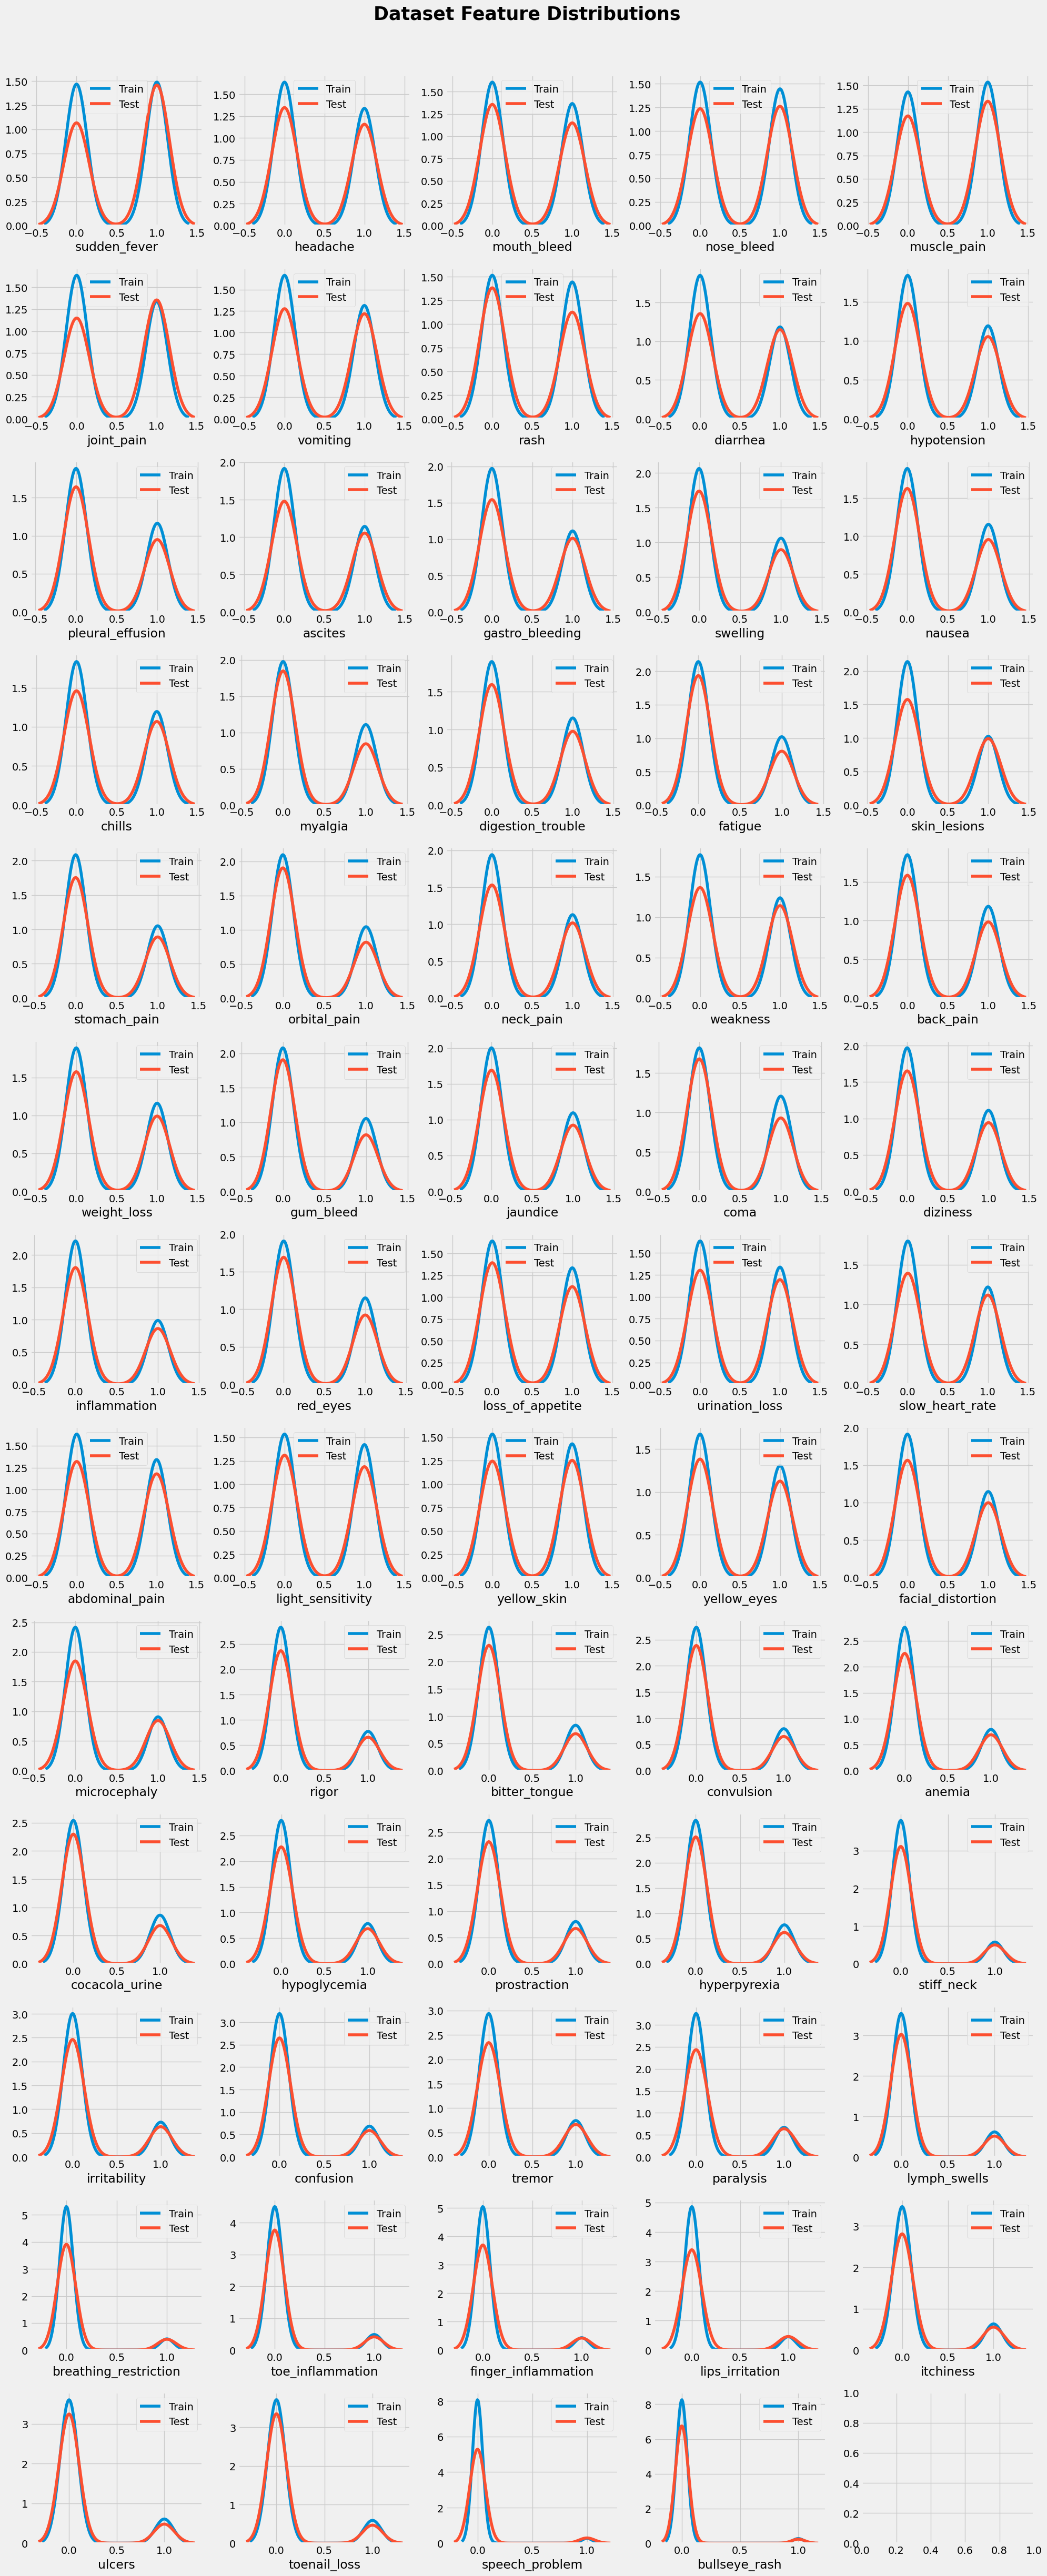

In [ ]:
distribution_view(train_df=train,
                  test_df=test,
                  features=cat_features,
                  NCOLS=5)

Признаки в этих данных это симптомы болезней, недуги у людей. Так как признаки все бинарные, то *0* означает отсутствие симптома у человека, а *1* наоборот. Основное различие между тренировочными и тестовыми данными заключается в том, что распределение нулей в признаках в тестовых данных ниже чем в тренировочных данных. Также стоит заметить, что некоторые признаки несбалансированы 

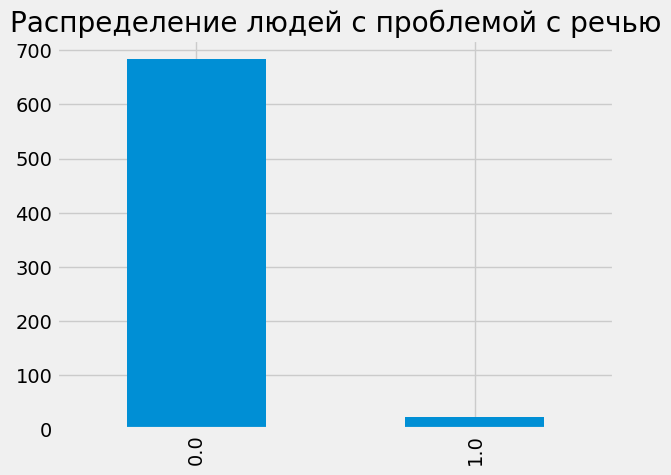

In [ ]:
train['speech_problem'].value_counts().plot(kind='bar', title='Распределение людей с проблемой с речью')
plt.show()

К примеру, сильно несбалансрованные классы можно наблюдать у признака ***speech_problem***. Но удалять этот признак, как и другие пока не стоит. Может наличие этого симптома говорит о какой-то конкретной болезни?

In [ ]:
pivot_table = train[['speech_problem','prognosis']].groupby(['prognosis']).sum()
pivot_table.sort_values(by=list(pivot_table.columns), ascending=False)

,speech_problem
prognosis,
Lyme_disease,9.0
Rift_Valley_fever,4.0
Dengue,2.0
Plague,2.0
Tungiasis,2.0
West_Nile_fever,2.0
Zika,2.0
Chikungunya,0.0
Japanese_encephalitis,0.0


Для болезни Лайма больше всего характерны проблемы с речью, поэтому удаление этого симптома может отрицательно сказаться в дальнейшем при обучении модели 

Подробнее посмотрим на распределение каждого признака в зависимости от болезней.

In [ ]:
ploting_cat_features(train, cat_features, 1)

Output hidden; open in https://colab.research.google.com to view.

Болезням ***Lyme_disease*** и ***West_Nile_fever*** присущи большинству симптомов. Такие симптомы как ***ulcers*** и ***toenail_loss*** могут говорить о наличии болезни ***Tungiasis***. В остальных случаях болезни распределены относительно равномерно

#### Target Distribution

Изобразим распределение болезней в обучающих данных.

In [ ]:
# train['prognosis'].value_counts().plot(kind='pie')
px.pie(train, names='prognosis', title='Prognosis Distribution', hole=0.4)

Целевой признак сбалансирован

### Data Cleaning and Processing

#### Correlation With All Features

<ipython-input-22-be33b9919bc2>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



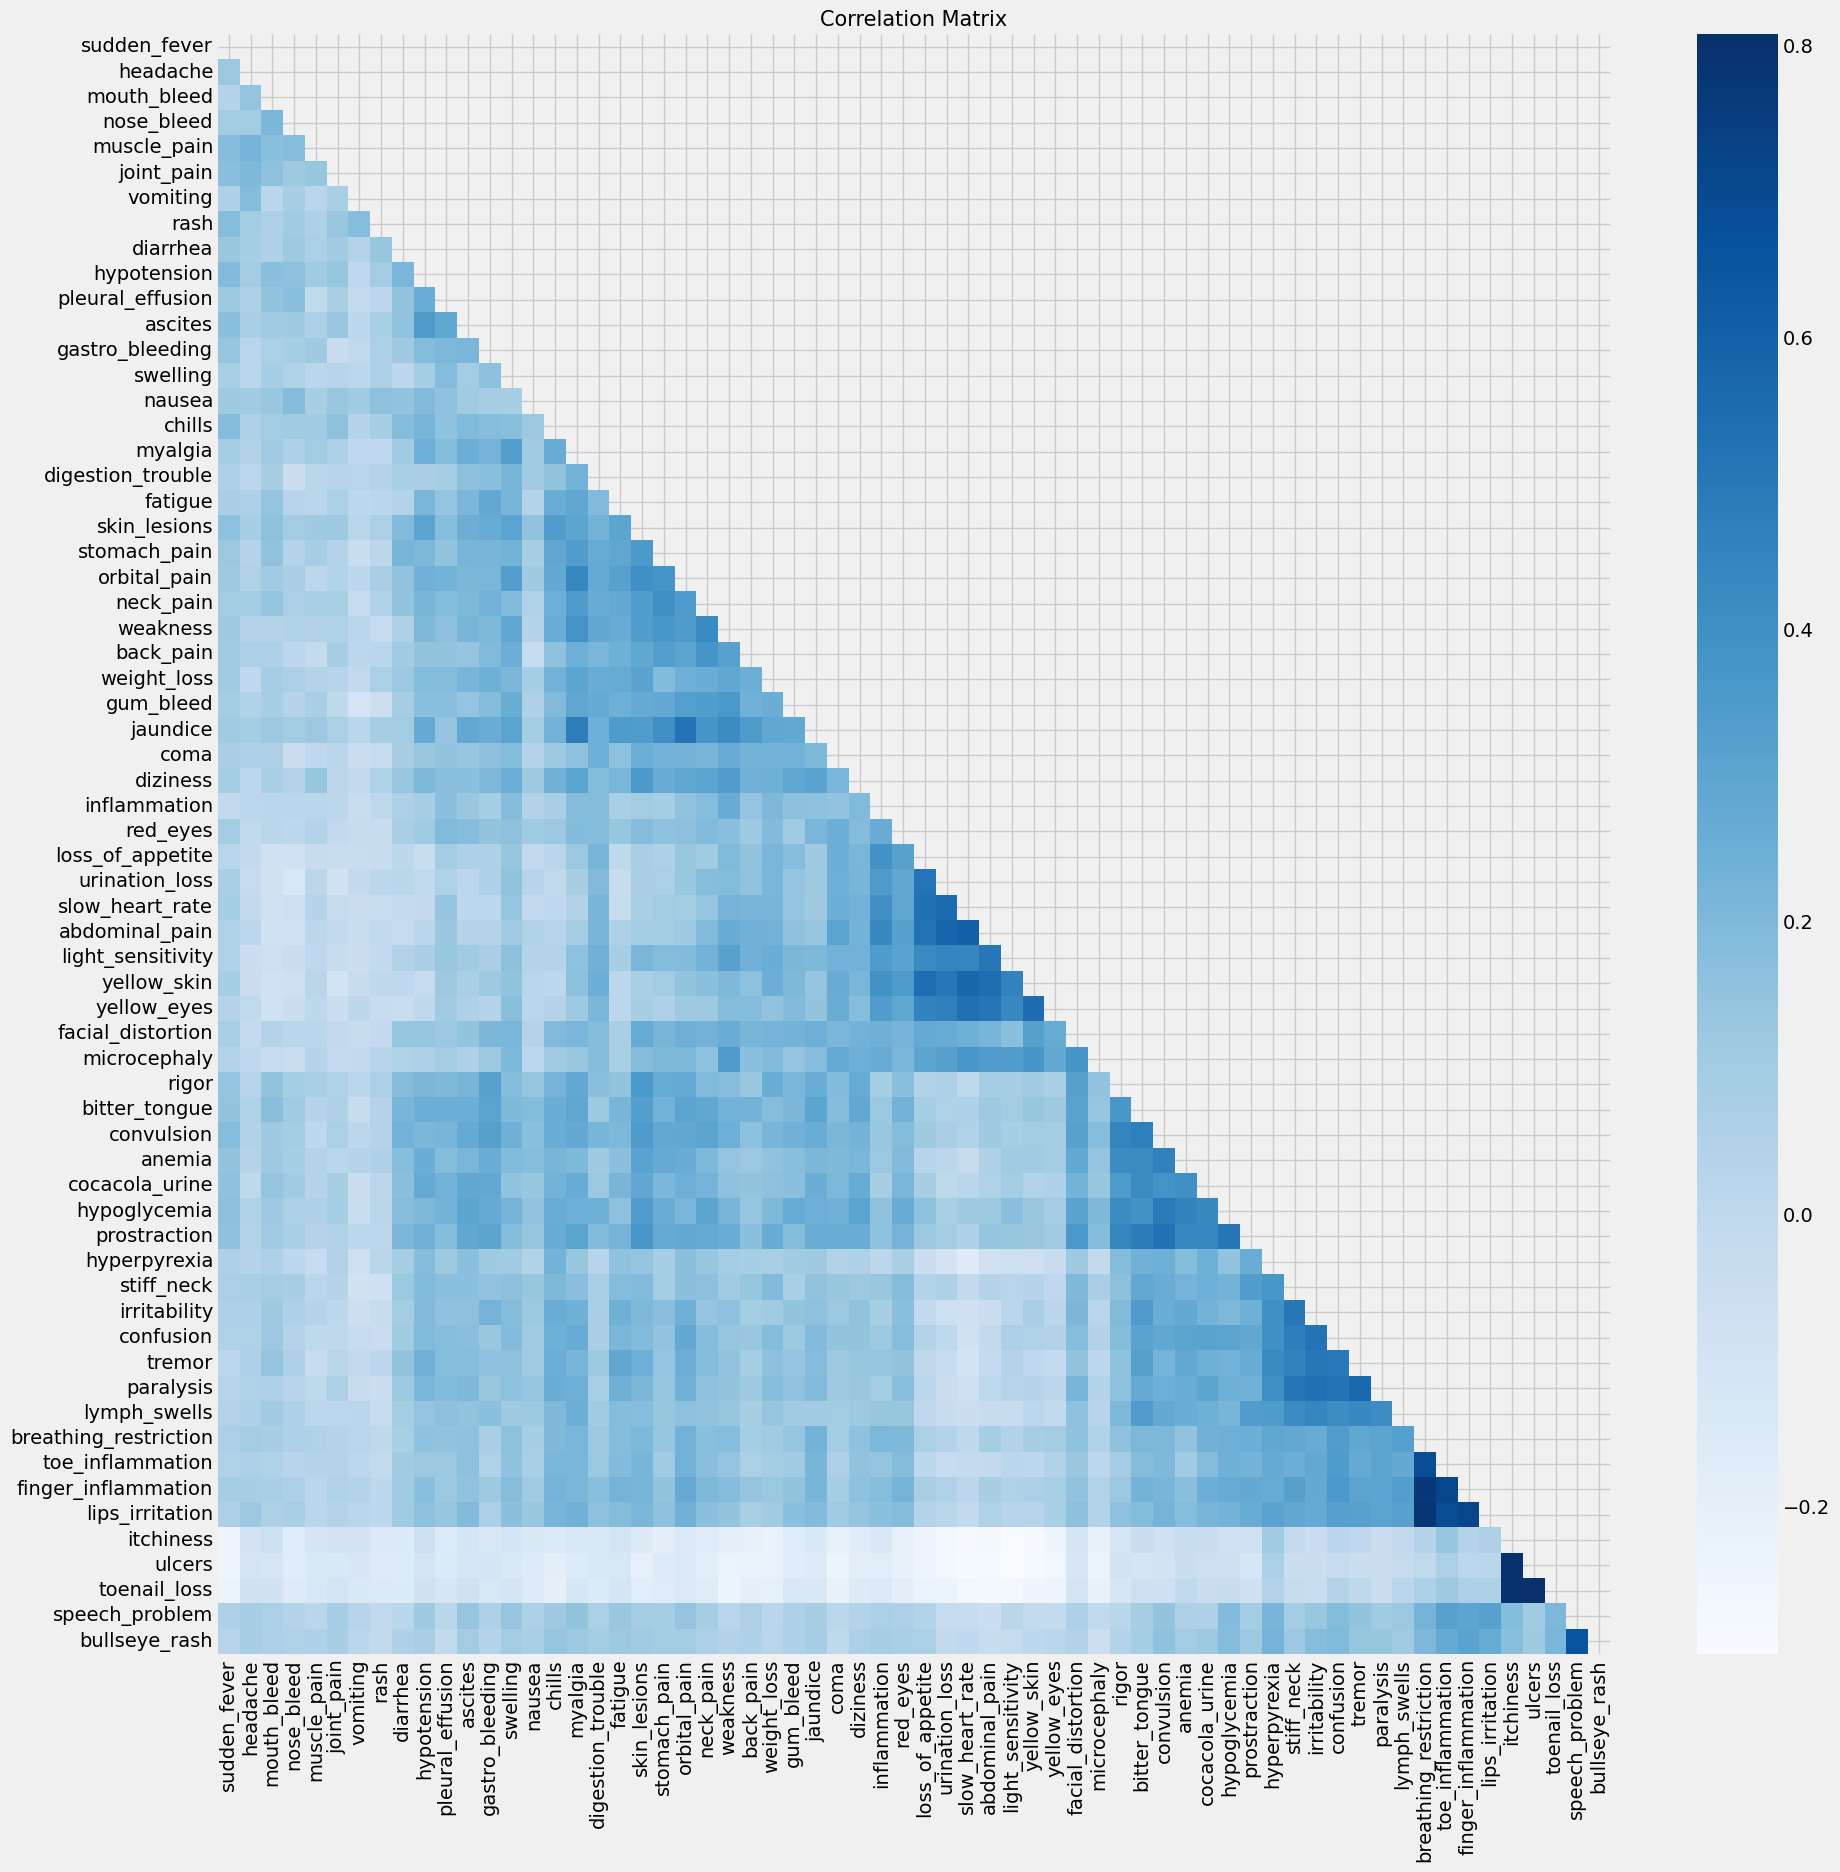

In [ ]:
f, ax = plt.subplots(figsize=(20,20))

corr_matrix = train.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True # Возвращает индексы для верхнего треугольника

sns.heatmap(corr_matrix, mask=mask, ax = ax,  cmap="Blues") # PiYG
ax.set_title(f'Correlation Matrix', fontsize=15)

plt.show()

Присутствует сильная линейная связь между ***toenail_loss***, ***ulcers*** и ***itchiness***. Эти симптомы часто встречаются у людей, болеющих ***Tungiasis***

Проверим данные на наличие дупликатов

In [ ]:
print(f'{red}{train.duplicated().sum()}')
print(f'{blu}{test.duplicated().sum()}')

0
0


#### Feature Engineering

Выведем кол-во вхождений симптомов для каждой болезни. Посмотрим, может какой-то болезни присуще определенные симптомы. Это поможет нам создать дополнительные признаки по возможности 

In [ ]:
disease_table = train.groupby(['prognosis']).sum().T \
                                            .reset_index()\
                                            .rename(columns = {'index':'symptom'})

disease_table.head()

prognosis,symptom,Chikungunya,Dengue,Japanese_encephalitis,Lyme_disease,Malaria,Plague,Rift_Valley_fever,Tungiasis,West_Nile_fever,Yellow_Fever,Zika
0,sudden_fever,40.0,26.0,41.0,39.0,31.0,27.0,35.0,16.0,43.0,28.0,30.0
1,headache,37.0,23.0,34.0,33.0,28.0,26.0,28.0,21.0,38.0,31.0,19.0
2,mouth_bleed,34.0,34.0,33.0,33.0,29.0,22.0,37.0,16.0,45.0,23.0,19.0
3,nose_bleed,45.0,35.0,34.0,35.0,29.0,27.0,28.0,14.0,54.0,22.0,22.0
4,muscle_pain,39.0,30.0,37.0,30.0,27.0,34.0,29.0,22.0,54.0,31.0,33.0


Визуализируем это

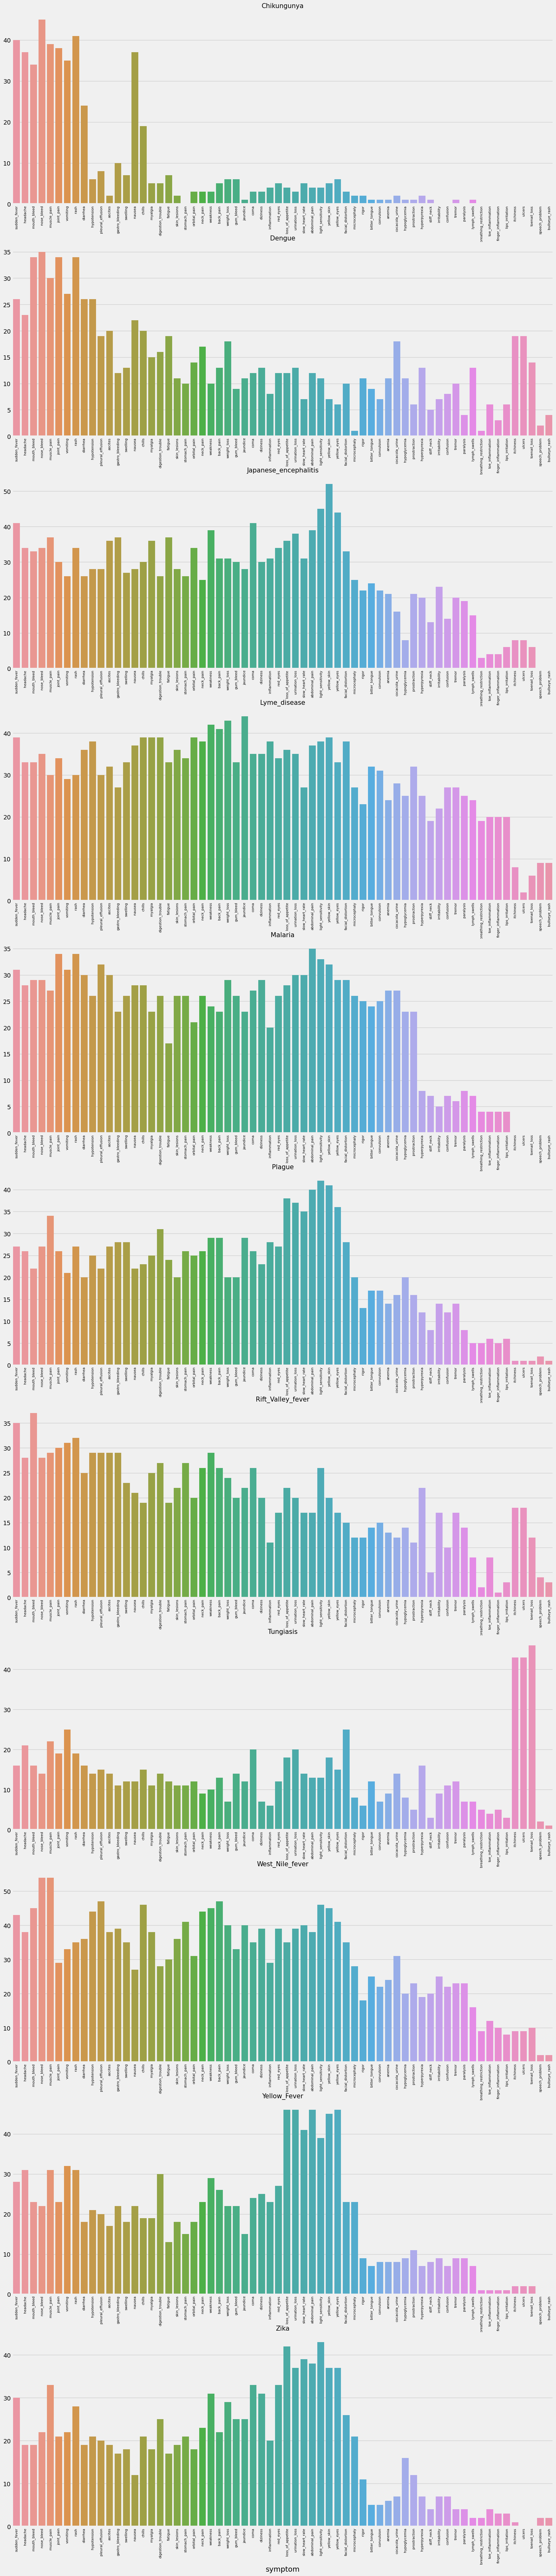

In [ ]:
prognosis = [col for col in disease_table.columns if col != 'symptom']

fig, ax = plt.subplots(nrows=len(prognosis), ncols=1, figsize=(20, 100))
ax = ax.flatten()

for i, prog in enumerate(prognosis):
    sns.barplot(data=disease_table, x='symptom', y=prog, ax=ax[i] )
    
    ax[i].set_title(prog, fontsize=15)
    ax[i].set_ylabel("")
    ax[i].tick_params(axis='x', labelsize=8)

    for label in ax[i].get_xticklabels():
        label.set_rotation(90)


Отметим еще раз, что для болезни ***Tungiasis*** характерны симптомы ***toenail_loss***, ***ulcers*** и ***itchiness***. Также очень показателен график распределения симптомов для болезни ***Chikungunya***

#### Dimensionality Reduction

Признаков много. Попробуем изобразить распределение признаков на плоскости, если будут четкие кластеры, то можно будет уменшить кол-во признаков без сильной потери информации

Воспользуемся методом главных компонент

In [ ]:
from sklearn.decomposition import PCA

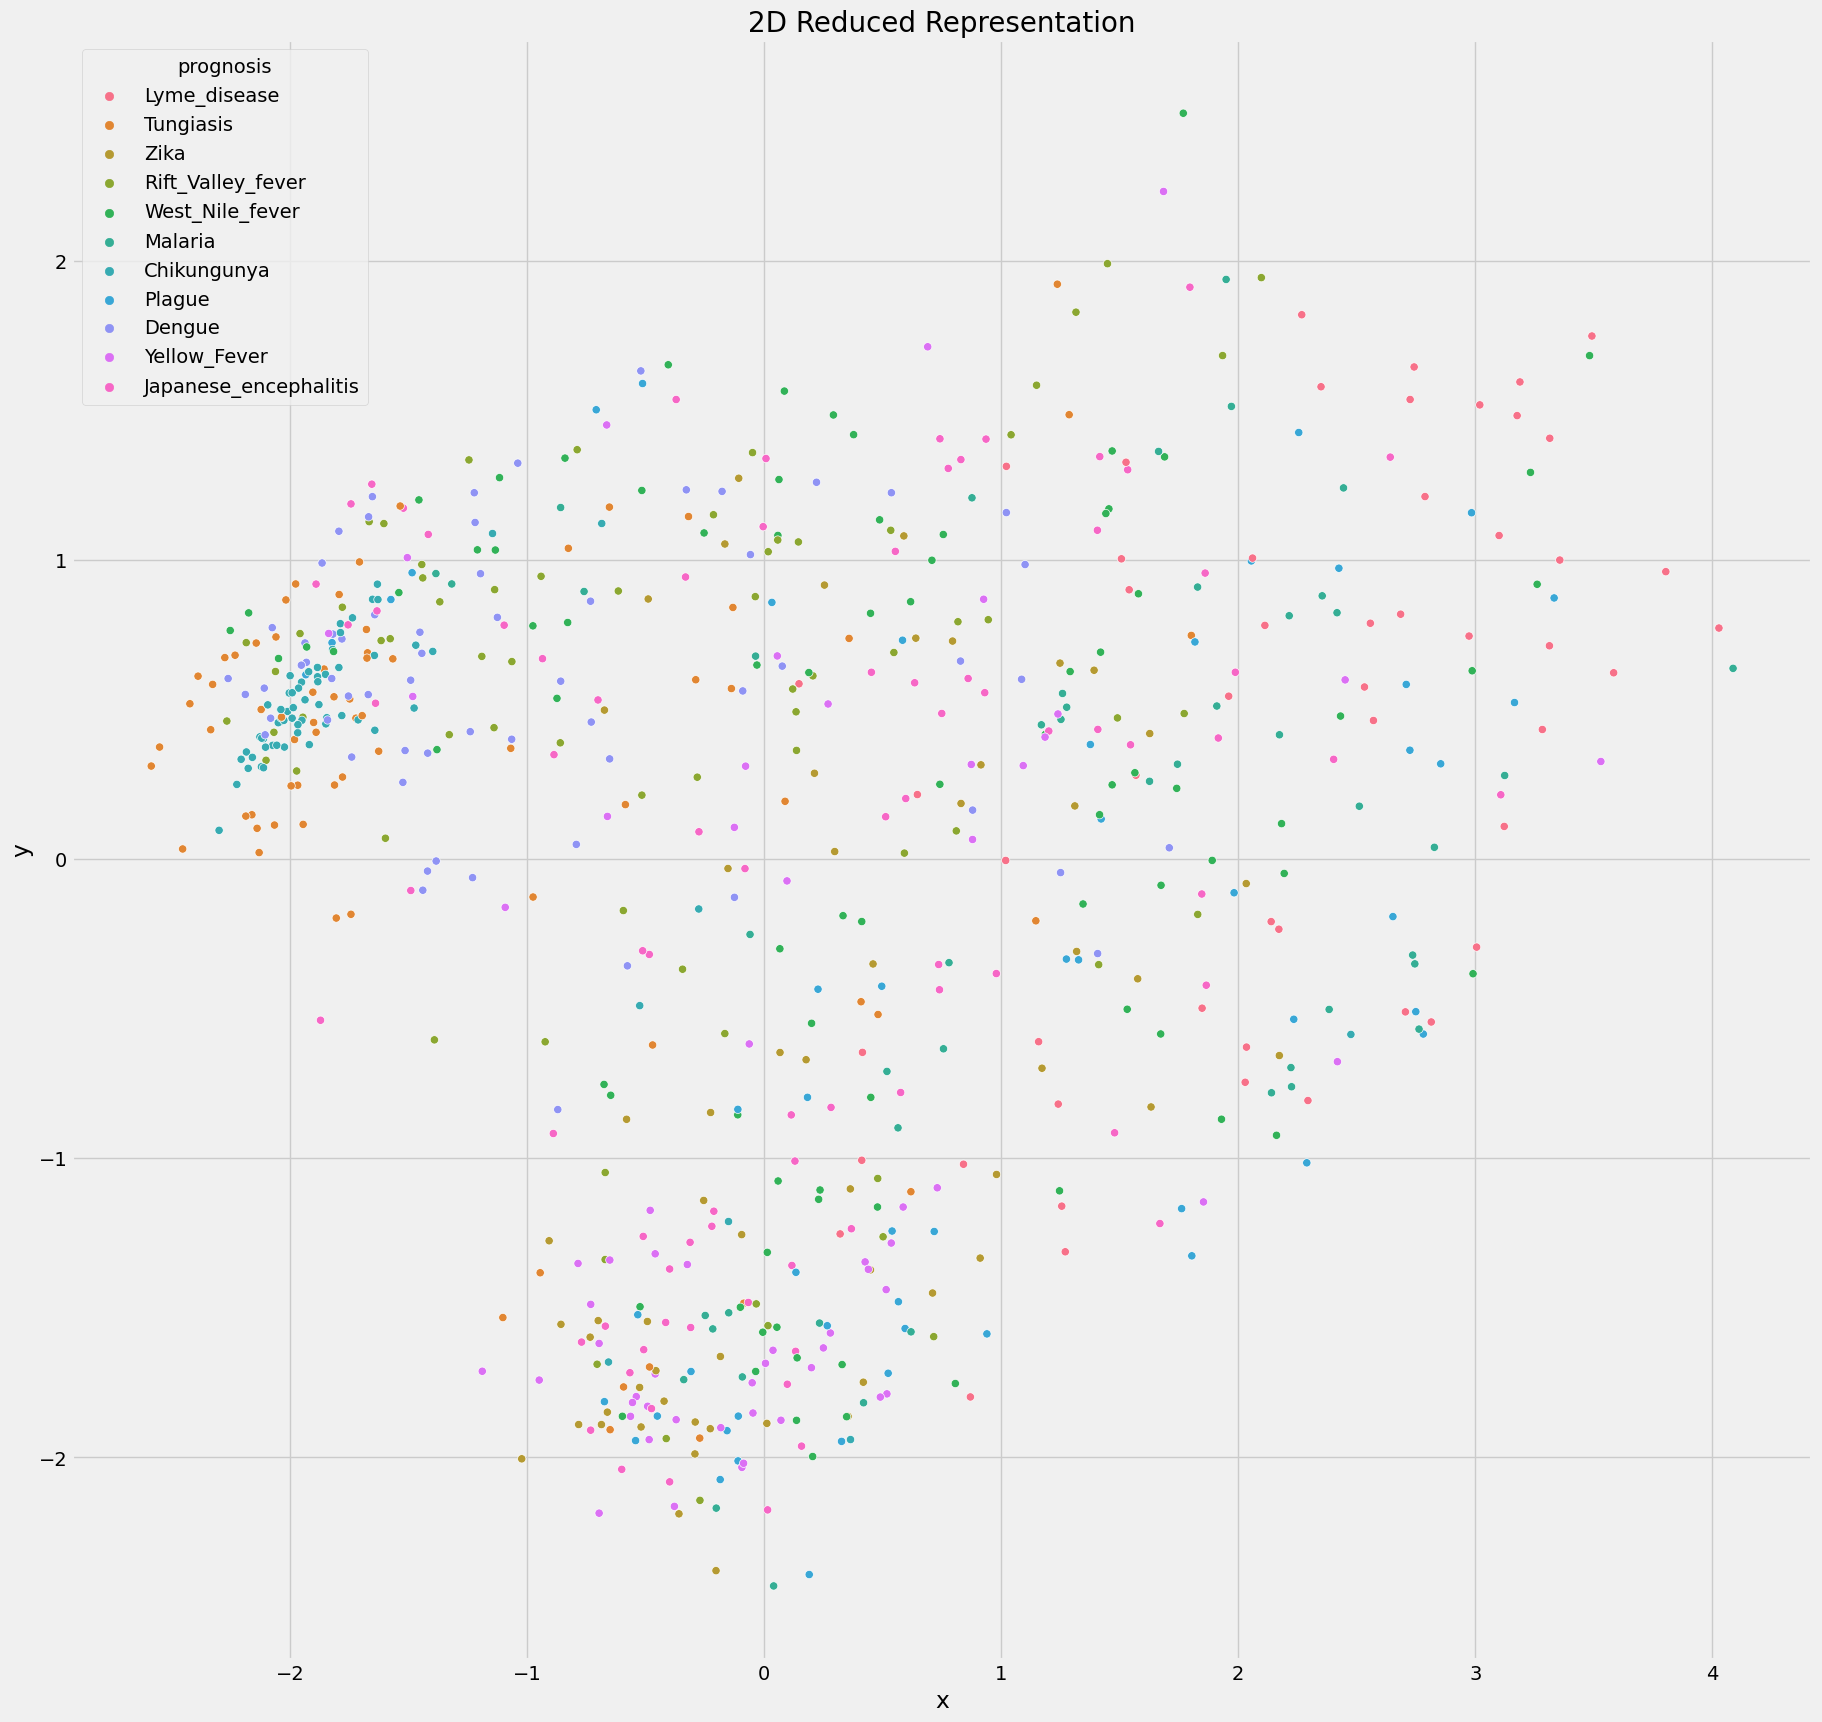

In [ ]:
pca_data = train.copy()
X = pca_data[cat_features]

pca = PCA(n_components=2, random_state=42)
reduced_data = pca.fit_transform(X)

pca_data["x"] = reduced_data[:, 0]
pca_data["y"] = reduced_data[:, 1]

fig, ax = plt.subplots(figsize=(20,20))
sns.scatterplot(data=pca_data, x='x', y='y', hue='prognosis', ax=ax)
ax.set_title('2D Reduced Representation', fontsize=20)
plt.show()

Как мы видим, разделение классов нео, по крайней мере, в двух измерениях.
***поменять текст***

Как мы видим, все пространство признаков нельзя представить в виде двух компонент.

Закодируем целевой признак с помощью Label Encoding

In [ ]:
le = LabelEncoder()
label = le.fit_transform(train['prognosis'])

### MAP@k

Воспользуемся метрикой ***Mean average precission***. В предсказаниях будем выводить топ *3* самые вероятные болезни у человека. Метрика поможет оценить насколько точно модель предсказывает болезнь. 

In [ ]:
def apk(actual, predicted, k=10):
    """
    Computes the average precision at k.
    This function computes the average prescision at k between two lists of
    items.
    Parameters
    ----------
    actual : list
             A list of elements that are to be predicted (order doesn't matter)
    predicted : list
                A list of predicted elements (order does matter)
    k : int, optional
        The maximum number of predicted elements
    Returns
    -------
    score : double
            The average precision at k over the input lists
    # """
    if len(predicted)>k:
        predicted = predicted[:k]

    score = 0.0
    num_hits = 0.0

    for i,p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i+1.0)

    if not actual:
        return 0.0

    return score / min(len(actual), k)

def mapk(actual, predicted, k=10):
    """
    Computes the mean average precision at k.
    This function computes the mean average prescision at k between two lists
    of lists of items.
    Parameters
    ----------
    actual : list
             A list of lists of elements that are to be predicted 
             (order doesn't matter in the lists)
    predicted : list
                A list of lists of predicted elements
                (order matters in the lists)
    k : int, optional
        The maximum number of predicted elements
    Returns
    -------
    score : double
            The mean average precision at k over the input lists
    """
    return np.mean([apk(a,p,k) for a,p in zip(actual, predicted)])

## Modelling

### Catboost With Optuna

Обучим ***Catboost***, подберем гиперпараметры модели через ***Optuna*** 

In [ ]:
# pip install catboost
# pip install optuna

In [ ]:
from catboost import CatBoostClassifier
import optuna
from sklearn.model_selection import RepeatedStratifiedKFold

***RepeatedStratifiedKFold*** построен аналогиично, что и ***StratifiedKFold***. Отличие заключается, что каждый шаг кросс-валидации будет повторяться. Этот способ помогает получить объективную оценку, избегая шумов 

In [ ]:
RANDOM_STATE = 42
N_FOLDS = 5
FEATURES = [col for col in train.columns if col != 'prognosis']
TARGET = 'prognosis'
k = 3

In [ ]:
skf = RepeatedStratifiedKFold(n_splits=N_FOLDS, n_repeats=10, random_state=RANDOM_STATE)

def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 50, 1000, step=50),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
        # "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "depth": trial.suggest_int("depth", 1, 12),
        # 'bootstrap_type': trial.suggest_categorical('bootstrap_type', ['Bayesian', 'Bernoulli']),
        'eval_metric': 'MultiClass',
        'loss_function': 'MultiClass',
        "random_seed": RANDOM_STATE
    }

    gbm = CatBoostClassifier(**params)
    scores = []

    for fold, (train_index, test_index) in enumerate(skf.split(train[FEATURES], train[TARGET])):

        print(10 * '=', f'FOLD = {fold + 1}', 10 * '=')
        X_train, X_valid = train.iloc[train_index][FEATURES], train.iloc[test_index][FEATURES]
        y_train, y_valid = train[TARGET].iloc[train_index], train[TARGET].iloc[test_index]

        gbm.fit(X_train, y_train, verbose=0)
        preds = gbm.predict_proba(X_valid)
        top_preds = np.argsort(-preds, axis=1)[:, :k]
        score = mapk(y_valid.values.reshape(-1, 1), top_preds, k)
        scores.append(score)

        print(f'FOLD = {fold + 1}, MAP@{k} = {score:.2f}')    
    
    print(30*'=')
    # print(f'Mean average precission: {np.mean(scores):.2f}')

    return scores

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

trial = study.best_trial
print(f'Best score: {study.best_value}')

[I 2023-05-20 22:31:53,473] A new study created in memory with name: no-name-8a3bff48-9ab7-48ae-925d-b1912f282186
<ipython-input-56-f23fa1ecc3b8>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),


========== FOLD = 1 ==========
FOLD = 1, MAP@3 = 0.40
========== FOLD = 2 ==========
FOLD = 2, MAP@3 = 0.38
========== FOLD = 3 ==========
FOLD = 3, MAP@3 = 0.38
========== FOLD = 4 ==========
FOLD = 4, MAP@3 = 0.33
========== FOLD = 5 ==========
FOLD = 5, MAP@3 = 0.35
========== FOLD = 6 ==========
FOLD = 6, MAP@3 = 0.41
========== FOLD = 7 ==========
FOLD = 7, MAP@3 = 0.34
========== FOLD = 8 ==========
FOLD = 8, MAP@3 = 0.35
========== FOLD = 9 ==========
FOLD = 9, MAP@3 = 0.36
========== FOLD = 10 ==========
FOLD = 10, MAP@3 = 0.36
========== FOLD = 11 ==========
FOLD = 11, MAP@3 = 0.38
========== FOLD = 12 ==========
FOLD = 12, MAP@3 = 0.35
========== FOLD = 13 ==========
FOLD = 13, MAP@3 = 0.33
========== FOLD = 14 ==========
FOLD = 14, MAP@3 = 0.41
========== FOLD = 15 ==========
FOLD = 15, MAP@3 = 0.37
========== FOLD = 16 ==========
FOLD = 16, MAP@3 = 0.38
========== FOLD = 17 ==========
FOLD = 17, MAP@3 = 0.35
========== FOLD = 18 ==========
FOLD = 18, MAP@3 = 0.39
==========

[W 2023-05-20 22:35:08,283] Trial 0 failed with parameters: {'iterations': 700, 'learning_rate': 0.033256886158256595, 'depth': 3} because of the following error: The number of the values 50 did not match the number of the objectives 1..
[W 2023-05-20 22:35:08,285] Trial 0 failed with value [0.3967136150234742, 0.3814553990610329, 0.38179669030732855, 0.33451536643026003, 0.34988179669030733, 0.4131455399061033, 0.3427230046948357, 0.3546099290780142, 0.35579196217494086, 0.35815602836879434, 0.37793427230046944, 0.3509389671361502, 0.3274231678486998, 0.4148936170212766, 0.36643026004728124, 0.37676056338028163, 0.352112676056338, 0.3877068557919621, 0.3120567375886525, 0.367612293144208, 0.32511737089201875, 0.31690140845070425, 0.38888888888888884, 0.38652482269503546, 0.36524822695035464, 0.4072769953051643, 0.397887323943662, 0.3404255319148936, 0.3569739952718676, 0.3747044917257683, 0.36384976525821594, 0.38028169014084506, 0.34515366430260047, 0.3628841607565012, 0.327423167848

FOLD = 50, MAP@3 = 0.41
========== FOLD = 1 ==========


<ipython-input-56-f23fa1ecc3b8>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
[W 2023-05-20 22:38:26,367] Trial 1 failed with parameters: {'iterations': 550, 'learning_rate': 0.05974443702228749, 'depth': 11} because of the following error: KeyboardInterrupt('').
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-56-f23fa1ecc3b8>", line 24, in objective
    gbm.fit(X_train, y_train, verbose=0)
  File "/usr/local/lib/python3.10/dist-packages/catboost/core.py", line 5131, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_b

KeyboardInterrupt: ignored

### Random Forest With Optuna

Обучим случайный лес и также подберем гиперпараметры через ***Optuna***

In [ ]:
from sklearn.ensemble import RandomForestClassifier

В бэггинге можно использовать ***Out Of Bag***. Это послужит кросс-валидацией нашей модели

In [ ]:
def objective(trial):    
    
    params = {
        'n_estimators' : trial.suggest_int("n_estimators", 200, 1000, log=True),
        'max_depth' : trial.suggest_int("max_depth", 5, 20, log=True),
        'max_features' : trial.suggest_float('max_features', 0.1, 1.0),
        'min_samples_split' : trial.suggest_int('min_samples_split', 2, 50),
        'min_samples_leaf' : trial.suggest_int('min_samples_leaf', 1, 25),
        'max_samples' : trial.suggest_float('max_samples', 0.2, 0.99),
        'random_state' : RANDOM_STATE
    }
    
    model = RandomForestClassifier(**params,
        bootstrap=True,
        verbose=0,
        oob_score=True,
        n_jobs=-1
    )

    model.fit(train[FEATURES], label)
    pred_tr = model.oob_decision_function_
    
    sorted_prediction_ids = np.argsort(-pred_tr, axis=1)
    top_3_prediction_ids = sorted_prediction_ids[:,:3]
    score = mapk(label.reshape(-1, 1), top_3_prediction_ids, k=3)    
    
    return score

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

[I 2023-05-20 22:58:41,718] A new study created in memory with name: no-name-aa5880d9-cf35-4b53-91d7-114aa51b1b6e
[I 2023-05-20 22:58:42,373] Trial 0 finished with value: 0.31494578029231496 and parameters: {'n_estimators': 215, 'max_depth': 14, 'max_features': 0.9060451260850048, 'min_samples_split': 4, 'min_samples_leaf': 25, 'max_samples': 0.5327934450553449}. Best is trial 0 with value: 0.31494578029231496.
[I 2023-05-20 22:58:43,106] Trial 1 finished with value: 0.3222536539368222 and parameters: {'n_estimators': 234, 'max_depth': 5, 'max_features': 0.8775131374136712, 'min_samples_split': 40, 'min_samples_leaf': 7, 'max_samples': 0.49276880110311005}. Best is trial 1 with value: 0.3222536539368222.
[I 2023-05-20 22:58:44,040] Trial 2 finished with value: 0.3149457802923149 and parameters: {'n_estimators': 249, 'max_depth': 14, 'max_features': 0.6255046683318156, 'min_samples_split': 5, 'min_samples_leaf': 22, 'max_samples': 0.6622805817220784}. Best is trial 1 with value: 0.32225

## Submission

In [ ]:
model = RandomForestClassifier(**study.best_params)
model.fit(train[FEATURES], label)

pred_test = model.predict_proba(test[FEATURES])

In [ ]:
pred_test.reshape(-1,1)

array([[0.11493172],
       [0.12343706],
       [0.11533471],
       ...,
       [0.1573913 ],
       [0.09611456],
       [0.16236715]])

In [ ]:
test_top_pred_ids = np.argsort(-pred_test, axis=1)[:,:3]

original_shape = test_top_pred_ids.shape
test_top_pred_ids = le.inverse_transform(test_top_pred_ids.reshape(-1, 1))
test_top_pred_ids = test_top_pred_ids.reshape(original_shape)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
test_top_pred_ids[:5]

array([['Rift_Valley_fever', 'West_Nile_fever', 'Dengue'],
       ['Dengue', 'Chikungunya', 'Malaria'],
       ['West_Nile_fever', 'Japanese_encephalitis', 'Rift_Valley_fever'],
       ['Japanese_encephalitis', 'Rift_Valley_fever', 'Yellow_Fever'],
       ['Malaria', 'West_Nile_fever', 'Japanese_encephalitis']],
      dtype=object)

In [ ]:
test['prognosis'] = np.apply_along_axis(lambda x: np.array(' '.join(x), dtype="object"), 1, test_top_pred_ids)

In [ ]:
test.head()

,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,hypotension,pleural_effusion,ascites,gastro_bleeding,swelling,nausea,chills,myalgia,digestion_trouble,fatigue,skin_lesions,stomach_pain,orbital_pain,neck_pain,weakness,back_pain,weight_loss,gum_bleed,jaundice,coma,diziness,inflammation,red_eyes,loss_of_appetite,urination_loss,slow_heart_rate,abdominal_pain,light_sensitivity,yellow_skin,yellow_eyes,facial_distortion,microcephaly,rigor,bitter_tongue,convulsion,anemia,cocacola_urine,hypoglycemia,prostraction,hyperpyrexia,stiff_neck,irritability,confusion,tremor,paralysis,lymph_swells,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash,prognosis
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Rift_Valley_fever West_Nile_fever Dengue
1,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dengue Chikungunya Malaria
2,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,West_Nile_fever Japanese_encephalitis Rift_Val...
3,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Japanese_encephalitis Rift_Valley_fever Yellow...
4,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Malaria West_Nile_fever Japanese_encephalitis


In [ ]:
test[['prognosis']]

,prognosis
0,Rift_Valley_fever West_Nile_fever Dengue
1,Dengue Chikungunya Malaria
2,West_Nile_fever Japanese_encephalitis Rift_Val...
3,Japanese_encephalitis Rift_Valley_fever Yellow...
4,Malaria West_Nile_fever Japanese_encephalitis
...,...
298,Plague Yellow_Fever West_Nile_fever
299,Lyme_disease Malaria Plague
300,West_Nile_fever Lyme_disease Malaria
301,Rift_Valley_fever Zika West_Nile_fever


In [ ]:
submission.head()

,id,prognosis
0,707,Dengue Zika Japanese_encephalitis
1,708,Dengue Zika Japanese_encephalitis
2,709,Dengue Zika Japanese_encephalitis
3,710,Dengue Zika Japanese_encephalitis
4,711,Dengue Zika Japanese_encephalitis


In [ ]:
RF_submission = submission.copy()
RF_submission[TARGET] = test['prognosis']
RF_submission.to_csv("RF_sub_v2.csv",index=False)
RF_submission.head()

,id,prognosis
0,707,Rift_Valley_fever West_Nile_fever Dengue
1,708,Dengue Chikungunya Malaria
2,709,West_Nile_fever Japanese_encephalitis Rift_Val...
3,710,Japanese_encephalitis Rift_Valley_fever Yellow...
4,711,Malaria West_Nile_fever Japanese_encephalitis


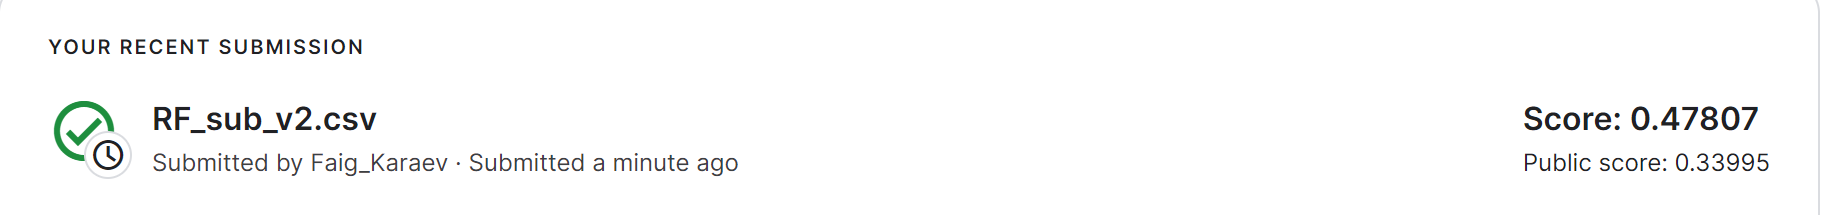